# Import Python Libraries

In [1]:
import numpy as np
import time
import random

In [2]:
from sklearn.ensemble import RandomForestClassifier 
import sklearn.metrics as metrics

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

print( tf.__version__ )

2.8.2


# FASHION data

In [4]:
# Load in Fashion Data from mnist dataset
mnist = tf.keras.datasets.fashion_mnist # 28x28 Fashion Image Data

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]


# NUMBER data

In [5]:
#Load in Data
mnist = tf.keras.datasets.mnist # 28x28 Handwritten Digits 0-9

In [6]:


(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the Data
x_train = tf.keras.utils.normalize( x_train, axis=1 )
x_test = tf.keras.utils.normalize( x_test, axis=1 )

x_train = x_train / 255 
x_test = x_test / 255 



11501568/11490434 [==============================] - 0s 0us/step


In [7]:

print( type( x_train ) )
print( x_train.shape )

print( type( y_train ) )
print( y_train.shape )


<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)


In [8]:
INPUT_SHAPE = x_train[0].shape
print("Shape = ", INPUT_SHAPE )

TOTAL_SIZE = INPUT_SHAPE[0] * INPUT_SHAPE[1]
print("TOTAL SIZE = ", TOTAL_SIZE)


Shape =  (28, 28)
TOTAL SIZE =  784


In [9]:
def getRandomIndex( DATA ) :
    return random.randint(0, DATA.shape[0] )

who= 57531
9
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

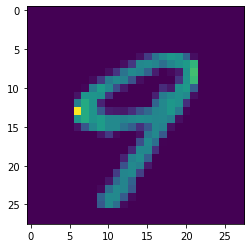

In [10]:

who=0
who=getRandomIndex( x_train )

print("who=", who)

print( y_train[who])
print( x_train[who])
plt.imshow(x_train[who], plt.cm.binary) 
plt.imshow(x_train[who] ) 


# SOLVE USING RANDOM FORESTS

In [11]:
new_x_train = []
for i in x_train :
    new_x_train.append( i.flatten() )
new_x_train = np.array( new_x_train )

new_x_test = []
for i in x_test :
    new_x_test.append( i.flatten() )
new_x_test = np.array( new_x_test )

print( x_train.shape )
print( new_x_train.shape )

(60000, 28, 28)
(60000, 784)


In [12]:

start_time = time.time()

theTrees = int( 2*TOTAL_SIZE )

clf = RandomForestClassifier( n_estimators = theTrees )
clf.fit( new_x_train, y_train )

print("Execution Time = ", (time.time()-start_time) )


Execution Time =  1024.386351108551


In [13]:
pred_train = clf.predict( new_x_train )
print( pred_train[0] )
RF_acc_train = metrics.accuracy_score(y_train, pred_train )
print( "train accuracy", RF_acc_train )

pred_test = clf.predict( new_x_test )
print( pred_test[0] )
RF_acc = metrics.accuracy_score(y_test, pred_test )
print( "test accuracy", RF_acc )


5
train accuracy 1.0
7
test accuracy 0.9716


# SOLVE USING TENSOR FLOW NEURAL NETWORKS

In [14]:
theEpochs = 2

theActivation = tf.keras.activations.relu


units_01 = int( 2*TOTAL_SIZE )
units_02 = units_01

DENSE_LAYER_01 = tf.keras.layers.Dense( units=units_01, activation=theActivation )
DENSE_LAYER_02 = tf.keras.layers.Dense( units=units_02, activation=theActivation )
DENSE_LAYER_XX = tf.keras.layers.Dense(10, activation=tf.nn.softmax )

DROPOUT_LAYER = tf.keras.layers.Dropout( 0.2 )


theOptimizer = tf.keras.optimizers.Adam()
theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()

theSplit = 0.2
theBatchSize = 32
verboseFlag = True

theTensorFlowSaveFile = "TF_Number_Model"

In [15]:

# Build the Model

start_time = time.time()

model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Flatten( input_shape=INPUT_SHAPE ) )
model.add( DENSE_LAYER_01 )
model.add( DROPOUT_LAYER )
model.add( DENSE_LAYER_02 )
model.add( DENSE_LAYER_XX )
model.compile( optimizer=theOptimizer, loss=theLossMetric )
model.compile( optimizer=theOptimizer, loss=theLossMetric, metrics=['accuracy'] )
model.fit(x_train, y_train, epochs=theEpochs, verbose = verboseFlag )
model.fit(x_train, y_train, epochs=theEpochs, validation_split=theSplit, batch_size=theBatchSize, verbose = verboseFlag )


print("Execution Time = ", (time.time()-start_time) )




Epoch 1/2
1875/1875 [==============================] - 75s 39ms/step - loss: 0.5990 - accuracy: 0.8091
Epoch 2/2
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2817 - accuracy: 0.9136
Epoch 1/2
1500/1500 [==============================] - 59s 40ms/step - loss: 0.2075 - accuracy: 0.9363 - val_loss: 0.1685 - val_accuracy: 0.9504
Epoch 2/2
1500/1500 [==============================] - 60s 40ms/step - loss: 0.1728 - accuracy: 0.9466 - val_loss: 0.1506 - val_accuracy: 0.9551
Execution Time =  263.75560760498047


In [16]:
probs = model.predict( x_test )

pred_list = []
for p in probs :
    pred_list.append( np.argmax( p ) )
pred = np.array( pred_list )
acc_score = metrics.accuracy_score( y_test, pred)

for i in range(5) :
    who = getRandomIndex( x_test )
    print("WHO = ", who, " Predicte =", pred[who], " Actual = ", y_test[who] )

print(" --------- ")
print("accuracy = ", acc_score)


WHO =  258  Predicte = 2  Actual =  2
WHO =  4384  Predicte = 2  Actual =  2
WHO =  9393  Predicte = 7  Actual =  7
WHO =  7078  Predicte = 6  Actual =  6
WHO =  2001  Predicte = 5  Actual =  5
 --------- 
accuracy =  0.953


In [17]:
NN_loss, NN_acc = model.evaluate( x_test, y_test )
print("loss=",NN_loss)
print("accuracy",NN_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.1519 - accuracy: 0.9530
loss= 0.15189671516418457
accuracy 0.953000009059906


In [18]:
model.save( theTensorFlowSaveFile )

In [19]:
new_model= tf.keras.models.load_model( theTensorFlowSaveFile )

In [20]:
predictions = new_model.predict( x_test )

[2.8338618e-05 2.3738360e-06 1.4741045e-03 6.6946779e-07 8.3591399e-04
 1.1744317e-04 9.9746621e-01 5.1877419e-07 7.4423668e-05 2.2285455e-08]
predict= 6 actual= 6


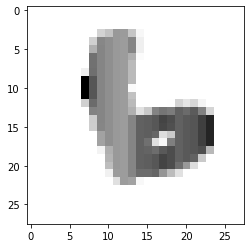

In [21]:
who=getRandomIndex( x_test )
print( predictions[who]) # probability score
result = np.argmax( list(predictions[who]) )
print("predict=",result,"actual=",y_test[who])
plt.imshow( x_test[who], plt.cm.binary )
plt.show()

# Accuracy of RANDOM FOREST and NEURAL NETWORK

In [22]:
print("RF accuracy", RF_acc )
print("NN accuracy",NN_acc)

RF accuracy 0.9716
NN accuracy 0.953000009059906
